# Modelling and Evaluation Notebook

* Credits to Code Institute: All code below is either re-modeled, re-structed or re-created to fit this project.

## Objectives

*   Answer business requirement 2: 
    * The client is interested to tell whether a given cherry leaf contains mildew or not.


## Inputs

* inputs/cherry-leaves_dataset/cherry-leaves/train
* inputs/cherry-leaves_dataset/cherry-leaves/test
* inputs/cherry-leaves_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs
* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.




## Additional Comments | Insights | Conclusions


---

---

# Import regular packages

In [2]:
# Credits to Code Institute: All code below is either re-modeled, re-structed or re-created to fit this project.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

# Set Working Directory

In [3]:
cwd= os.getcwd()

In [4]:
os.chdir('/workspace/cherry')
print("You set a new current directory")

You set a new current directory


In [5]:

work_dir = os.getcwd()
work_dir

'/workspace/cherry'

---

## Set input directories

Set train, validation and test paths

In [6]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)


Old version is already available create a new version.


## Set labels

In [8]:

labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)


Project Labels: ['healthy', 'powdery_mildew']


## Set image shape

In [9]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




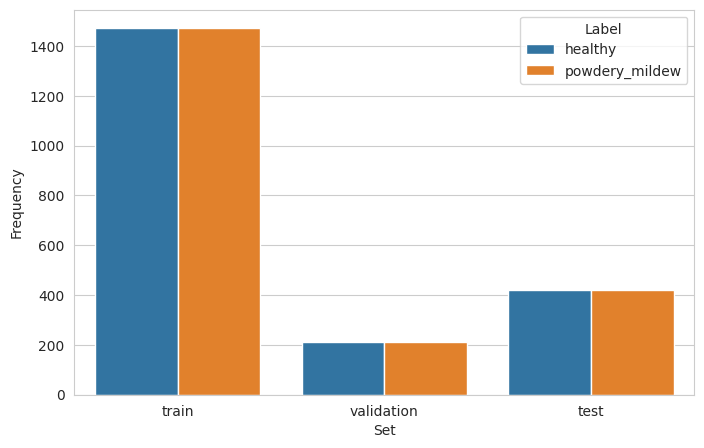

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_freq = pd.DataFrame([])

for folder in ['train', 'validation', 'test']:
    for label in labels:
        data = {'Set': folder,
                'Label': label,
                'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
        new_series = pd.Series(data)

        df_freq = pd.concat([df_freq, new_series.to_frame().T], ignore_index=True)

        print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

---

### ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-23 08:25:05.191427: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 08:25:05.195494: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 08:25:05.242290: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 08:25:06.508022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


* ### Initialize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ### Augment training image dataset

In [13]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices


Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [15]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices


Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment test image dataset

In [16]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices


Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

In [17]:
import matplotlib.pyplot as plt

try:
  print(img.shape)
  if len(img.shape) == 3 and img.shape[2] in (3, 4):
    plt.imshow(img)
    plt.show()
  else:
    print("Image format not supported or has unexpected dimensions")
except Exception as e:
  print(f"Error displaying image: {e}")

Error displaying image: name 'img' is not defined


## Plot augmented validation and test images

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import DirectoryIterator

for i in range(3):
  try:
    img, label = validation_set[i]
    print(img.shape)

    if len(img.shape) != 3:
        print(f"Image {i} has unexpected shape: {img.shape}")
        continue

    plt.imshow(img)
    plt.show()
  except IndexError:
    print("Reached end of validation set")
    break


(20, 256, 256, 3)
Image 0 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 1 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 2 has unexpected shape: (20, 256, 256, 3)


In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import DirectoryIterator

for i in range(3):
  try:
    img, label = test_set[i]
    print(img.shape)


    if len(img.shape) != 3:
      print(f"Image {i} has unexpected shape: {img.shape}")
      continue

    if img.shape[0] != 256:
      img = img[..., :3]

    plt.imshow(img)
    plt.show()
  except IndexError:
    print("Reached end of test set")
    break


(20, 256, 256, 3)
Image 0 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 1 has unexpected shape: (20, 256, 256, 3)
(20, 256, 256, 3)
Image 2 has unexpected shape: (20, 256, 256, 3)


## Save class_indices

In [20]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")


['outputs/v1/class_indices.pkl']

---

# Model creation

---

## ML model

* ### Import model packages

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

* ### Model 

In [22]:

def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


* ### Model Summary 

In [23]:
create_tf_model().summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

* ### Early Stopping 

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)


## Fit model for model training

In [25]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )


Epoch 1/25


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.7218 - loss: 0.5169 - val_accuracy: 0.9690 - val_loss: 0.1249
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:11 898ms/step - accuracy: 1.0000 - loss: 0.0174

2024-06-23 08:28:43.820537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 0.9619 - val_loss: 0.1351
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9749 - loss: 0.0865 - val_accuracy: 0.9929 - val_loss: 0.0172
Epoch 4/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:13 915ms/step - accuracy: 0.9500 - loss: 0.1704

2024-06-23 08:31:53.720043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9500 - loss: 0.1704 - val_accuracy: 0.9810 - val_loss: 0.0677
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9706 - loss: 0.1073 - val_accuracy: 0.9762 - val_loss: 0.0703
Epoch 6/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:22 977ms/step - accuracy: 1.0000 - loss: 0.0181

2024-06-23 08:34:59.812205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 0.9786 - val_loss: 0.0698


## Save model

In [26]:
model.save('outputs/v1/mildew_detector_model.h5')

---

# Model Performace

---

## Model learning curve

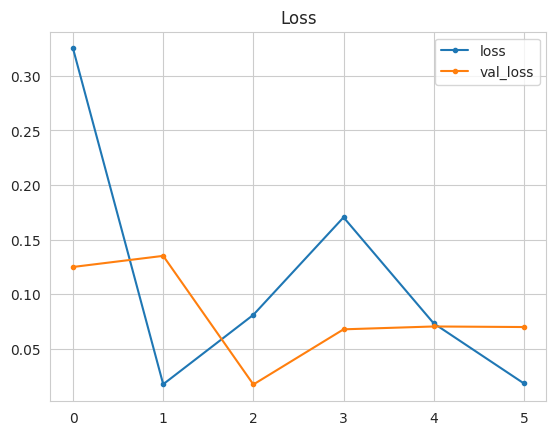

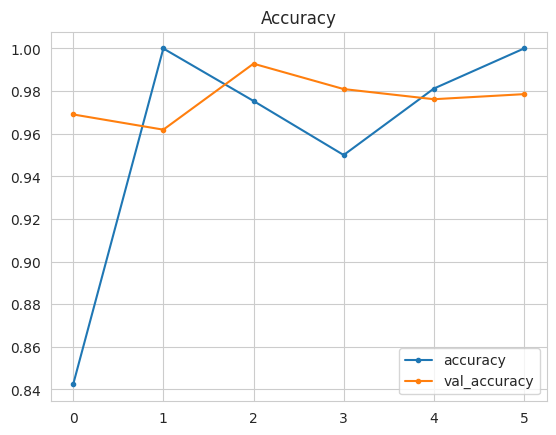

In [27]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.jpg',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.jpg',
            bbox_inches='tight', dpi=150)
plt.show()


## Model Evaluation

Load saved model

In [28]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

Evaluate model on test set

In [29]:
evaluation = model.evaluate(test_set)


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 379ms/step - accuracy: 0.9952 - loss: 0.0253


### Save evaluation pickle

In [30]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")


['outputs/v1/evaluation.pkl']

## Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


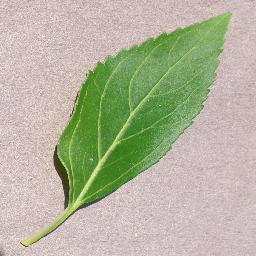

In [32]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


Convert image to array and prepare for prediction

In [33]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [34]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
0.9998876227182336
healthy


---

# Push files to Repo

## Push generated/new files from this Session to your GitHub repo

* .gitignore

In [35]:
!cat .gitignore

inputs/cherry-leaves_dataset/cherry-leaves/test
inputs/cherry-leaves_dataset/cherry-leaves/train
kaggle.json
*.ipynb
__pycache__/



* Git status

In [36]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   app.py
	modified:   jupyter_notebooks/03 - Modelling and Evaluating.ipynb
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/mildew_detector_model.h5
	modified:   outputs/v1/model_training_acc.jpg
	modified:   outputs/v1/model_training_losses.jpg
	deleted:    requirements copy.txt
	deleted:    requirements_before fix.txt
	deleted:    requirements_ver.txt

no changes added to commit (use "git add" and/or "git commit -a")


* Git add

In [37]:
!git add .

* Git commit

In [38]:
!git commit -am " Add new plots"

[main c80b08b]  Add new plots


 9 files changed, 29 insertions(+), 163 deletions(-)
 delete mode 100644 requirements copy.txt
 delete mode 100644 requirements_before fix.txt
 delete mode 100644 requirements_ver.txt


* Git Push

In [39]:
!git push

Enumerating objects: 21, done.
Counting objects: 100% (21/21), done.
Delta compression using up to 16 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 65.50 MiB | 10.73 MiB/s, done.
Total 11 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File outputs/v1/mildew_detector_model.h5 is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/OV00VO/cherry.git
   7356d05..c80b08b  main -> main


---